In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("8. Netflix Dataset.csv")

In [15]:
df.sample()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
4760,s4761,TV Show,Paquita Salas,NaN,"Brays Efe, Belén Cuesta, Lidia San José, Álex ...",Spain,"June 28, 2019",TV-MA,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","One of Spain's best talent agents in the '90s,..."


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


Task. 1) Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.

In [20]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [21]:
df=df.drop_duplicates()
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


Task. 2) Is there any Null Value present in any column ? Show with Heat-map.

In [22]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

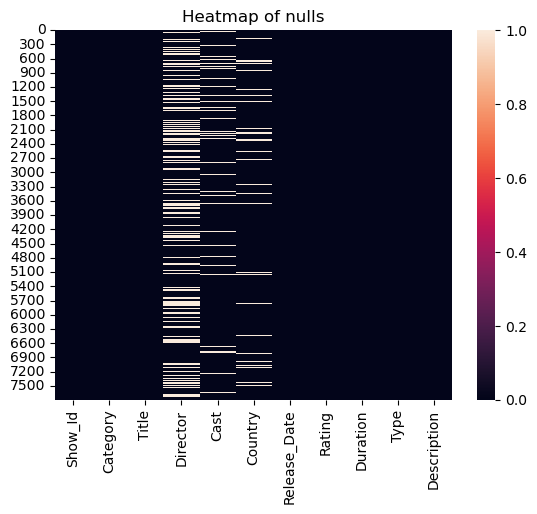

In [19]:
sns.heatmap(df.isnull())
plt.title("Heatmap of nulls")
plt.show()

 For 'House of Cards', what is the Show Id and Who is the Director of this show ?

In [24]:
df[df['Title']=='House of Cards'][['Show_Id','Director']]

,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


 In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.

In [27]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'].str.strip())

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7787 non-null   object        
 1   Category      7787 non-null   object        
 2   Title         7787 non-null   object        
 3   Director      5399 non-null   object        
 4   Cast          7069 non-null   object        
 5   Country       7280 non-null   object        
 6   Release_Date  7777 non-null   datetime64[ns]
 7   Rating        7780 non-null   object        
 8   Duration      7787 non-null   object        
 9   Type          7787 non-null   object        
 10  Description   7787 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 730.0+ KB


In [ ]:
df['Year'] = df['Release_Date'].dt.year
df.sample()

In [36]:
df_yearly_count =  df.groupby('Year')[['Title']].count()

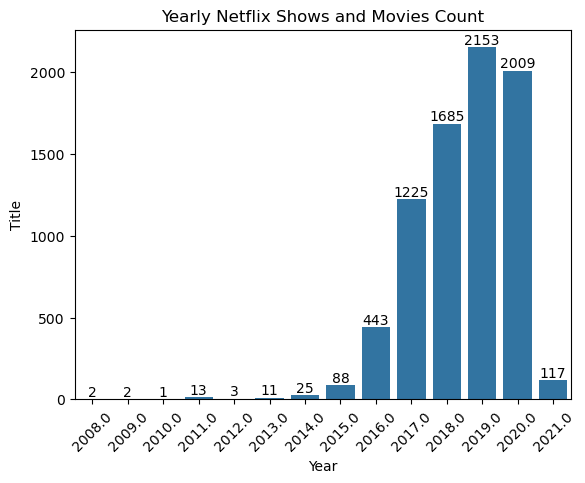

In [55]:
sns.barplot(data=df_yearly_count,x='Year',y='Title')
plt.title("Yearly Netflix Shows and Movies Count")
plt.xticks(rotation=45)
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)
plt.show()

How many Movies & TV Shows are in the dataset ? Show with Bar Graph.

In [45]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0


In [51]:
df.Category.value_counts()

Category
Movie      5377
TV Show    2410
Name: count, dtype: int64

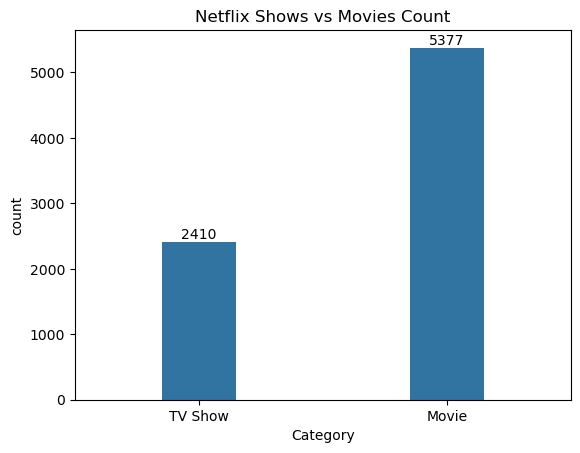

In [ ]:
sns.countplot(data=df,x='Category', width=0.3)
plt.title("Netflix Shows vs Movies Count")
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Show all the Movies that were released in year 2000.

In [69]:
df[(df['Category']=='Movie') & (df['Year']==2000)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year


 Show only the Titles of all TV Shows that were released in India only.

In [76]:
df[(df['Category']=='TV Show') & (df['Country']=='India')][['Title']]

,Title
86,21 Sarfarosh: Saragarhi 1897
132,7 (Seven)
340,Agent Raghav
364,Akbar Birbal
533,Anjaan: Rural Myths
...,...
6249,The Creative Indians
6400,The Golden Years with Javed Akhtar
6469,The House That Made Me
7294,Typewriter


Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

In [89]:
df['Director'].value_counts().sort_values(ascending=False).head(10)

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Lance Bangs                8
Name: count, dtype: int64

 Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".

In [90]:
df.sample()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
4931,s4931,TV Show,Power Rangers Dino Thunder,NaN,"James Napier, Kevin Duhaney, Emma Lahana, Jaso...",United States,2016-01-01,TV-Y7,1 Season,Kids' TV,Dr. Tommy Oliver returns when his students dis...,2016.0


In [91]:
df[((df['Category']=='Movie') & (df['Type']=='Comedies')) & (df['Country']=='United Kingdom') ]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
1368,s1369,Movie,Christmas Survival,James Dearden,"Julian Ovenden, Gemma Whelan, Joely Richardson...",United Kingdom,2019-11-01,TV-MA,101 min,Comedies,"With Christmas just around the corner, sisters...",2019.0
1650,s1651,Movie,Dead in a Week (Or Your Money Back),Tom Edmunds,"Tom Wilkinson, Aneurin Barnard, Freya Mavor, M...",United Kingdom,2019-03-01,TV-MA,90 min,Comedies,After several failed attempts at taking his ow...,2019.0
2225,s2226,Movie,For Love or Money,Mark Murphy,"Robert Kazinsky, Samantha Barks, Ed Speleers, ...",United Kingdom,2019-08-16,TV-MA,95 min,Comedies,When a goofy but likable millionaire discovers...,2019.0
4210,s4211,Movie,"Monty Python Live (Mostly): One Down, Five to Go",Eric Idle,"John Cleese, Terry Gilliam, Eric Idle, Terry J...",United Kingdom,2018-10-02,TV-MA,137 min,Comedies,"Live from London in a sold-out final show, sur...",2018.0
4213,s4214,Movie,Monty Python: Live at The Hollywood Bowl,"Terry Hughes, Ian MacNaughton","Graham Chapman, John Cleese, Terry Gilliam, Er...",United Kingdom,2018-10-02,R,80 min,Comedies,Film clips and Terry Gilliam animations featur...,2018.0
4781,s4782,Movie,Parrot Sketch Not Included: Twenty Years of Mo...,Ian MacNaughton,"Steve Martin, John Cleese, Graham Chapman, Ter...",United Kingdom,2018-10-02,TV-14,72 min,Comedies,"Presented by Steve Martin, this anthology draw...",2018.0
4792,s4793,Movie,PATRICK (2019),Mandie Fletcher,"Beattie Edmondson, Ed Skrein, Tom Bennett, Jen...",United Kingdom,2019-05-16,TV-PG,94 min,Comedies,"When a schoolteacher inherits an adorable pug,...",2019.0
6109,s6109,Movie,The Bad Education Movie,Elliot Hegarty,"Jack Whitehall, Joanna Scanlan, Iain Glen, Eth...",United Kingdom,2018-12-15,TV-MA,87 min,Comedies,Britain's most ineffective but caring teacher ...,2018.0
6947,s6946,Movie,The Trip to Spain,Michael Winterbottom,"Steve Coogan, Rob Brydon, Marta Barrio, Claire...",United Kingdom,2017-12-12,TV-MA,108 min,Comedies,Comedians Steve Coogan and Rob Brydon gorge on...,2017.0


 In how many movies/shows, Tom Cruise was cast ?

In [92]:
df.sample()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
4314,s4315,Movie,My Entire High School Sinking Into the Sea,Dash Shaw,"Jason Schwartzman, Lena Dunham, Reggie Watts, ...",United States,2018-01-23,PG-13,77 min,"Comedies, Independent Movies",After an earthquake sends their school buildin...,2018.0


In [96]:
df[df['Cast'].str.contains('Tom Cruise',na=False)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020.0
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019.0


What are the different Ratings defined by Netflix ?

In [101]:
df.Rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

How many Movies got the 'TV-14' rating, in Canada ?

In [ ]:
df[(df['Category']=='Movie') & (df['Country']=='Canada') & (df['Rating']=='TV-14')].shape
# (11, 12) means that the answer is 11. 12 is the column count.

(11, 12)

How many TV Shows got the 'R' rating, after year 2018 ?

In [111]:
df[(df['Category']=='TV Show') & (df['Year']>2018) & (df['Rating']=='R')].shape
# The answer is 1.

(1, 12)

What is the maximum duration of a Movie/Show on Netflix ?

In [112]:
df.groupby('Category')['Duration'].max()

Category
Movie         99 min
TV Show    9 Seasons
Name: Duration, dtype: object

In [113]:
df[['Duration_num', 'Duration_type']] = df['Duration'].str.split(' ', expand=True)
df['Duration_num'] = df['Duration_num'].astype(int)

In [ ]:
df.groupby('Category')['Duration_num'].max()

Category
Movie      312
TV Show     16
Name: Duration_num, dtype: int64

Which individual country has the Highest No. of TV Shows ?

In [122]:
df[df['Category']=='TV Show']['Country'].value_counts()

Country
United States                                    705
United Kingdom                                   204
Japan                                            157
South Korea                                      147
India                                             71
                                                ... 
United Kingdom, Ireland, United States             1
United Kingdom, Spain                              1
Italy, United States                               1
Japan, Canada                                      1
United States, France, South Korea, Indonesia      1
Name: count, Length: 183, dtype: int64

In [123]:
df_tv = df[df['Category']=='TV Show']
df_tv['Country'] = df_tv['Country'].str.split(', ')
df_tv = df_tv.explode('Country')

C:\Users\wizzi\AppData\Local\Temp\ipykernel_5812\2775903550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv['Country'] = df_tv['Country'].str.split(', ')


In [132]:
df_show_per_country = df_tv['Country'].value_counts().reset_index().head(10)
df_show_per_country

,Country,count
0,United States,866
1,United Kingdom,256
2,Japan,184
3,South Korea,157
4,Canada,126
5,France,84
6,India,75
7,Taiwan,70
8,Australia,60
9,Spain,57


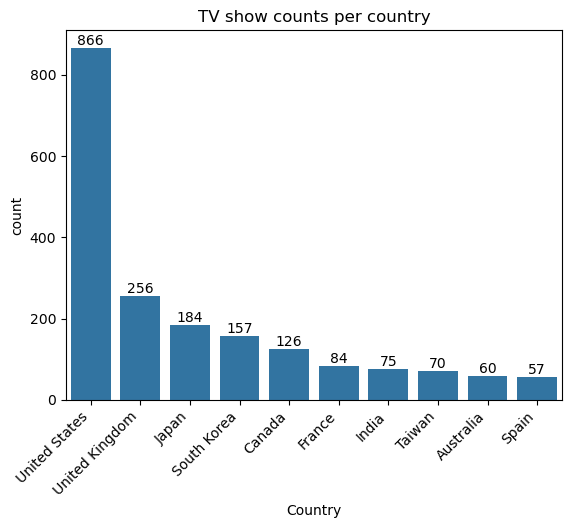

In [138]:
sns.barplot(data=df_show_per_country, x = 'Country', y = 'count' )
plt.title("TV show counts per country")
plt.xticks(rotation=45,ha='right')
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)
plt.show()

 How can we sort the dataset by Year ?

In [142]:
df = df.sort_values(by='Release_Date')
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Duration_num,Duration_type
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008.0,81,min
1765,s1766,TV Show,Dinner for Five,NaN,NaN,United States,2008-02-04,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008.0,1,Season
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009.0,104,min
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009.0,29,min
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010.0,84,min


Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.

In [145]:
df[((df['Category']=='Movie') & (df['Type']>'Dramas')) | ((df['Category']=='TV Show') & (df['Type']>"Kids' TV"))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Duration_num,Duration_type
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008.0,81,min
1765,s1766,TV Show,Dinner for Five,NaN,NaN,United States,2008-02-04,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008.0,1,Season
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009.0,104,min
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009.0,29,min
2041,s2042,Movie,Even the Rain,Icíar Bollaín,"Luis Tosar, Gael García Bernal, Juan Carlos Ad...","Spain, Mexico, France",2011-05-17,TV-MA,103 min,"Dramas, International Movies",While making a film about the incursion of Chr...,2011.0,103,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,s206,Movie,A Monster Calls,J.A. Bayona,"Lewis MacDougall, Sigourney Weaver, Felicity J...","United Kingdom, Spain, United States",2021-01-16,PG-13,108 min,"Dramas, Sci-Fi & Fantasy","Overwhelmed by his mother’s illness, a young b...",2021.0,108,min
5060,s5060,Movie,Radium Girls,"Lydia Dean Pilcher, Ginny Mohler","Joey King, Abby Quinn, Cara Seymour, Scott She...",United States,2021-01-16,TV-14,103 min,"Dramas, Independent Movies",When the women at a radium factory begin to fa...,2021.0,103,min
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN,4,Seasons
5138,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN,13,Seasons
